# Exploring length of stay in the ICU

In [48]:
# install.packages("RPostgreSQL")
require("RPostgreSQL")
require("ggplot2")

In [4]:
# load the PostgreSQL driver
drv <- dbDriver("PostgreSQL")

In [19]:
# create a connection to the postgres database
# set the search path to the mimiciii schema
con <- dbConnect(drv, dbname = "mimic",
                 host = "localhost", port = 5432,
                 user = "mimic")
dbSendQuery(con, 'set search_path to mimiciii')

In [34]:
# show a list of tables
dbListTables(con)

[1] "admissions"         "callout"            "caregivers"        
 [4] "chartevents"        "chartevents_1"      "chartevents_2"     
 [7] "chartevents_3"      "chartevents_4"      "chartevents_5"     
[10] "chartevents_6"      "chartevents_7"      "chartevents_8"     
[13] "chartevents_9"      "chartevents_10"     "chartevents_11"    
[16] "chartevents_12"     "chartevents_13"     "chartevents_14"    
[19] "cptevents"          "datetimeevents"     "diagnoses_icd"     
[22] "drgcodes"           "d_cpt"              "d_icd_diagnoses"   
[25] "d_icd_procedures"   "d_items"            "d_labitems"        
[28] "icustays"           "inputevents_cv"     "inputevents_mv"    
[31] "labevents"          "microbiologyevents" "noteevents"        
[34] "outputevents"       "prescriptions"      "procedureevents_mv"
[37] "procedures_icd"     "services"           "transfers"         
[40] "noteevents_deid"    "patients"

In [90]:
# assign ICU length of stay to variable
iculos = dbGetQuery(con, "select los from icustays where los >= 0 and los <=20")

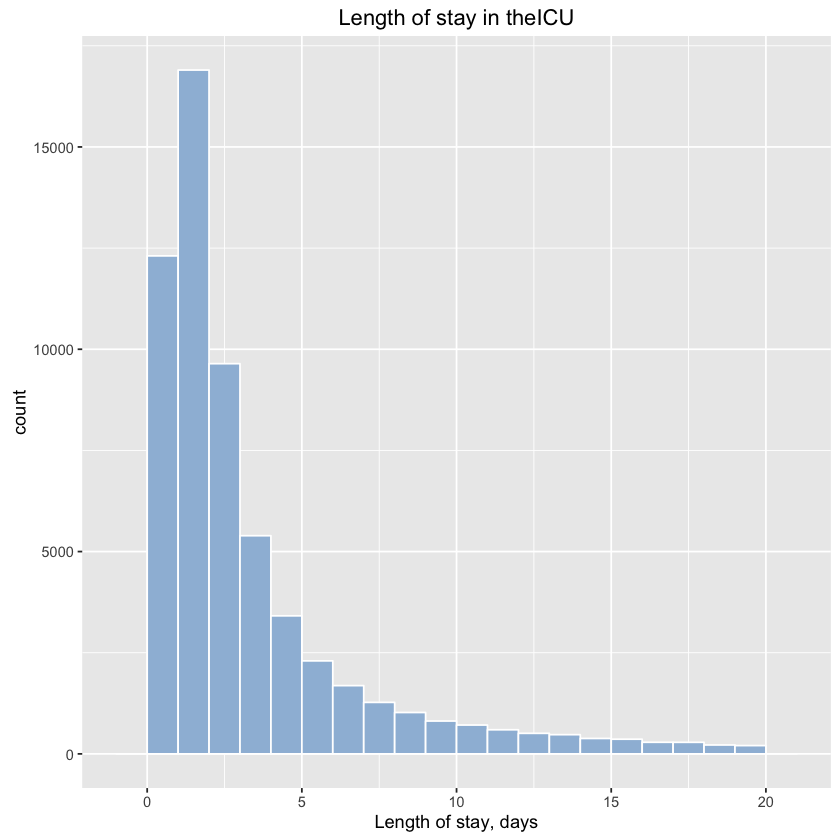

In [93]:
# plot histogram of length of stay in the ICU
qplot(iculos$los, geom="histogram", binwidth = 1, main = "Length of stay in the ICU", 
      xlab = "Length of stay, days", fill=I("#9ebcda"), col=I("#FFFFFF"))

In [ ]:
# close the connection
dbDisconnect(con)
dbUnloadDriver(drv)